<a href="https://colab.research.google.com/github/Shanthan0/Neural-Networks-and-Deep-Learning-Coursework/blob/main/ICP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Add one more hidden layer to autoencoder
2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib
3. Repeat the question 2 on the denoisening autoencoder
4. plot loss and accuracy using the history object

****

In [29]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer with 128 units
encoded = Dense(encoding_dim, activation='relu')(encoded)  # original encoding layer

# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)  # Another hidden layer for decoding
decoded = Dense(784, activation='sigmoid')(decoded)  # output layer for reconstruction

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6943 - val_loss: 0.6942
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


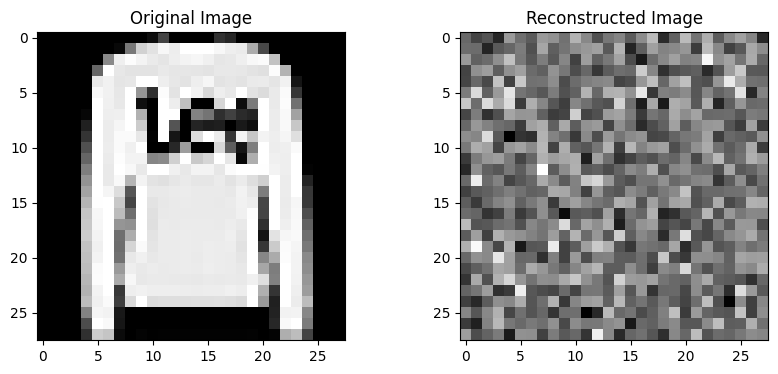

In [30]:
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Make predictions (reconstruct the test images)
reconstructed_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed image
n = 1  # Display the nth image
plt.figure(figsize=(10, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title("Original Image")

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Image")
plt.show()


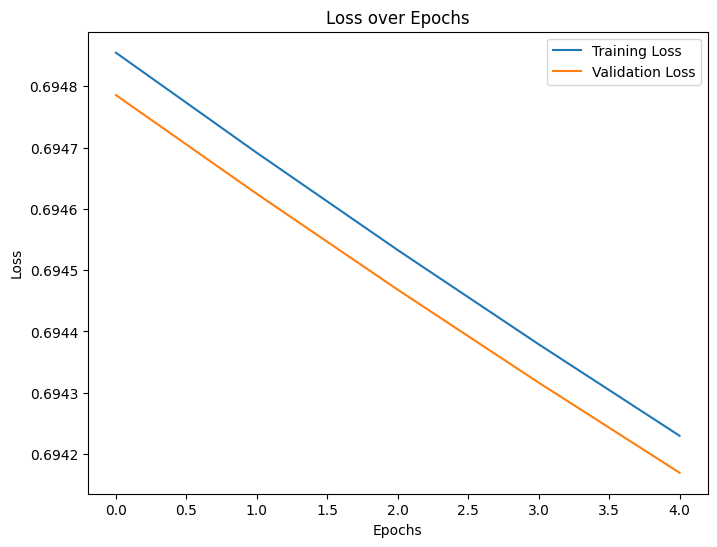

In [31]:
# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6941 - val_loss: 0.6940
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


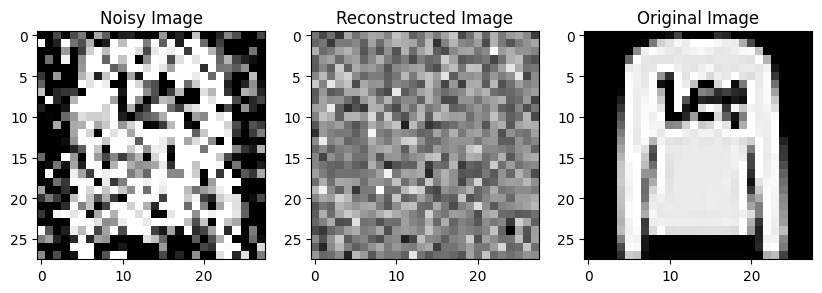

In [33]:
# Train the autoencoder with noisy data as input and clean data as output
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict with the noisy test data
reconstructed_imgs_noisy = autoencoder.predict(x_test_noisy)

# Visualize the noisy and reconstructed image
plt.figure(figsize=(10, 6))

# Noisy image
plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap='gray')
plt.title("Noisy Image")

# Reconstructed image
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_imgs_noisy[n].reshape(28, 28), cmap='gray')
plt.title("Reconstructed Image")

# Original image for comparison
plt.subplot(1, 3, 3)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.show()


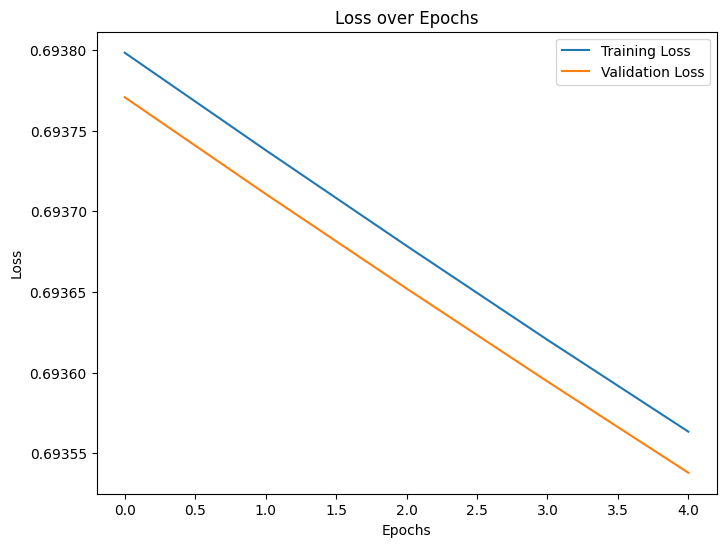

In [28]:
# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
